In [1]:
%matplotlib inline


# Comparison of ensembling classifiers internally using sampling


Ensembling classifiers have shown to improve classification performance compare
to single learner. However, they will be affected by class imbalance. This
example shows the benefit of balancing the training set before to learn
learners. We are making the comparison with non-balanced ensemble methods.

We make a comparison using the balanced accuracy and geometric mean which are
metrics widely used in the literature to evaluate models learned on imbalanced
set.


In [2]:

import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score
from sklearn.metrics import (balanced_accuracy_score, classification_report,
                             confusion_matrix, recall_score, roc_auc_score,
                             roc_curve, auc)
import pandas as pd
from sklearn.decomposition import PCA

def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

Load an imbalanced dataset
##############################################################################



In [3]:
train = pd.read_csv('data/wanzhou_island.csv')
train_labels = train['value']
train.head()

,Elevation,Slope,Aspect,A4,A5,A6,TRI,A8,A9,A10,...,C6,C7,C8,NDVI,NDWI,Rainfall,Earthquake,Land_use,value,ID
0,295,7.75467,284.9310,34.3289,8,0.700315,2.73861,5.08108,0.526814,33.48050,...,0.087924,2.54951,158.012,0.786250,0.326397,1134.47,1.85445,3,0,1
1,296,4.04531,352.8750,35.8758,6,0.712934,2.12132,5.70270,0.517350,53.20100,...,0.088662,2.54951,158.301,0.659509,0.255611,1134.45,1.85558,5,0,2
2,294,7.77054,45.0000,34.9304,5,0.735016,2.87228,4.02703,0.511041,-4.23753,...,0.117174,3.90513,161.590,0.610321,0.151975,1134.43,1.85671,4,0,3
3,290,9.53282,49.2364,31.0241,0,0.747634,3.67423,1.56757,0.523659,-5.49088,...,0.134222,9.89950,166.879,0.613824,0.237688,1134.47,1.85785,4,0,4
4,287,9.16787,47.2026,27.7863,4,0.760252,3.00000,1.72973,0.501577,-2.62842,...,0.139053,8.48528,171.167,0.582016,0.204665,1134.45,1.85898,4,0,5


In [4]:
# x_columns = [x for x in train.columns if x not in ['ID','value']]

x_columns = ['Elevation', 'Slope', 'Aspect', 'TRI', 'Curvature', 'Lithology', 'River', 'NDVI', 'NDWI', 'Rainfall', 'Earthquake', 'Land_use']

X, y = train[x_columns], train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Classification using ensemble method
##############################################################################

The results are reported in terms of balanced accuracy and geometric mean
which are metrics widely used in the literature to validate model trained on
imbalanced set.



Decision tree classifier performance:
Balanced accuracy: 0.90949 - Geometric mean 0.90578 - AUC 0.90949
[[137113   1181]
 [  1264   6064]]



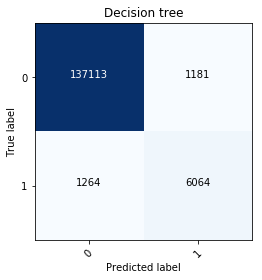

In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision tree classifier performance:')
print('Balanced accuracy: {:.5f} - Geometric mean {:.5f} - AUC {:.5f}'
      .format(balanced_accuracy_score(y_test, y_pred_tree),
              geometric_mean_score(y_test, y_pred_tree), roc_auc_score(y_test,y_pred_tree)))
cm_tree = confusion_matrix(y_test, y_pred_tree)
fig, ax = plt.subplots()
plot_confusion_matrix(cm_tree, classes=np.unique(train_labels), ax=ax,
                      title='Decision tree')


Classification using bagging classifier with and without sampling
##############################################################################
 Instead of using a single tree, we will check if an ensemble of decsion tree
 can actually alleviate the issue induced by the class imbalancing. First, we
 will use a bagging classifier and its counter part which internally uses a
 random under-sampling to balanced each boostrap sample.



In [15]:
bagging = BaggingClassifier(n_estimators=50, random_state=0)
balanced_bagging = BalancedBaggingClassifier(n_estimators=50, random_state=0)

bagging.fit(X_train, y_train)
balanced_bagging.fit(X_train, y_train)

y_pred_bc = bagging.predict(X_test)
y_pred_bbc = balanced_bagging.predict(X_test)

# Instanciate a PCA object
pca = PCA(n_components='mle')

# Instanciate a StandardScaler object
stdscaler = preprocessing.StandardScaler()


result_file_gdbt_weighted = './gdbt_weighted.txt'
probas_ = pipeline.fit(X_train, y_train).predict_proba(X_test)
save_results(GeoID, y_pred_gdbt_weighted, y_pred_proba_gdbt_weighted, result_file_gdbt_weighted)

Balancing each bootstrap sample allows to increase significantly the balanced
accuracy and the geometric mean.



Bagging classifier performance:
Balanced accuracy: 0.92 - Geometric mean 0.92
[[137879    415]
 [  1088   6240]]

Balanced Bagging classifier performance:
Balanced accuracy: 0.97 - Geometric mean 0.97
[[133371   4923]
 [   148   7180]]



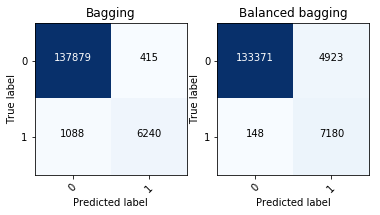

In [16]:
print('Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_bc),
              geometric_mean_score(y_test, y_pred_bc)))
cm_bagging = confusion_matrix(y_test, y_pred_bc)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_bagging, classes=np.unique(train_labels), ax=ax[0],
                      title='Bagging')

print('Balanced Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_bbc),
              geometric_mean_score(y_test, y_pred_bbc)))
cm_balanced_bagging = confusion_matrix(y_test, y_pred_bbc)
plot_confusion_matrix(cm_balanced_bagging, classes=np.unique(train_labels),
                      ax=ax[1], title='Balanced bagging')

Classification using random forest classifier with and without sampling
##############################################################################
 Random forest is another popular ensemble method and it is usually
 outperforming bagging. Here, we used a vanilla random forest and its balanced
 counterpart in which each bootstrap sample is balanced.



Random Forest classifier performance:
Balanced accuracy: 0.83 - Geometric mean 0.81
[[138067    227]
 [  2470   4858]]

Balanced Random Forest classifier performance:
Balanced accuracy: 0.94 - Geometric mean 0.94
[[124758  13536]
 [   176   7152]]



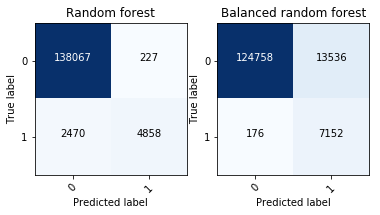

In [17]:
rf = RandomForestClassifier(n_estimators=50, random_state=0)
brf = BalancedRandomForestClassifier(n_estimators=50, random_state=0)

rf.fit(X_train, y_train)
brf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_brf = brf.predict(X_test)

# Similarly to the previous experiment, the balanced classifier outperform the
# classifier which learn from imbalanced bootstrap samples. In addition, random
# forest outsperforms the bagging classifier.

print('Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rf),
              geometric_mean_score(y_test, y_pred_rf)))
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_rf, classes=np.unique(train_labels), ax=ax[0],
                      title='Random forest')

print('Balanced Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_brf),
              geometric_mean_score(y_test, y_pred_brf)))
cm_brf = confusion_matrix(y_test, y_pred_brf)
plot_confusion_matrix(cm_brf, classes=np.unique(train_labels), ax=ax[1],
                      title='Balanced random forest')

Boosting classifier
##############################################################################
 In the same manner, easy ensemble classifier is a bag of balanced AdaBoost
 classifier. However, it will be slower to train than random forest and will
 achieve worse performance.



Easy ensemble classifier performance:
Balanced accuracy: 0.79 - Geometric mean 0.79
[[105064  33230]
 [  1347   5981]]

RUSBoost classifier performance:
Balanced accuracy: 0.79 - Geometric mean 0.79
[[102314  35980]
 [  1123   6205]]



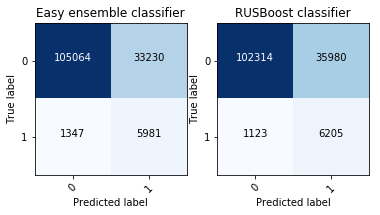

In [18]:
base_estimator = AdaBoostClassifier(n_estimators=10)
eec = EasyEnsembleClassifier(n_estimators=10,
                             base_estimator=base_estimator)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)
print('Easy ensemble classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_eec),
              geometric_mean_score(y_test, y_pred_eec)))
cm_eec = confusion_matrix(y_test, y_pred_eec)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_eec, classes=np.unique(train_labels), ax=ax[0],
                      title='Easy ensemble classifier')

rusboost = RUSBoostClassifier(n_estimators=10,
                              base_estimator=base_estimator)
rusboost.fit(X_train, y_train)
y_pred_rusboost = rusboost.predict(X_test)
print('RUSBoost classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rusboost),
              geometric_mean_score(y_test, y_pred_rusboost)))
cm_rusboost = confusion_matrix(y_test, y_pred_rusboost)
plot_confusion_matrix(cm_rusboost, classes=np.unique(train_labels),
                      ax=ax[1], title='RUSBoost classifier')

plt.show()

In [6]:
from sklearn import datasets, preprocessing
# Instanciate a PCA object
pca = ['PCA', PCA(n_components='mle')]

# Instanciate a StandardScaler object
stdscaler = ['STDSCALER',preprocessing.StandardScaler()]

lgb = LGBMClassifier(random_state=0, n_jobs=-1)
blgb = LGBMClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

lr = LogisticRegressionCV(cv=5, random_state=0)
blr = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced')

samplers = [
    ['RF', rf],
    ['BRF', brf],
    ['LR', lr],
    ['BLR', blr],
    ['lgb', lgb],
    ['blgb', blgb],
]

pipelines = [
    ['{}-{}-{}'.format(pca[0], stdscaler[0],samplers[0]),
     make_pipeline(pca[1], stdscaler[1],samplers[1])]
    for sampler in samplers
]

NameError: name 'DummySampler' is not defined